<a href="https://colab.research.google.com/github/Ahsanm221/starter-gunicorn/blob/main/Llama_3_1_8B_Instruct_Fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

# Define the file path
dataset_path = "/content/drive/MyDrive/datasets/dataset/alpaca_cleaned_dataset.json"

# Initialize empty lists for inputs and outputs
input_list = []
output_list = []

# Load the dataset and extract input/output pairs
with open(dataset_path, "r") as f:
    data = json.load(f)
    for entry in data:
        input_list.append(entry["input"])
        output_list.append(entry["output"])

# Print the number of entries to verify
print(f"Loaded {len(input_list)} inputs and {len(output_list)} outputs.")
# print(input_list[589])
# print(output_list[90])

Loaded 8740 inputs and 8740 outputs.


In [ ]:
# Define the instruction string for Llama 3.1
instruction_string = """You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details."""

# Initialize empty list for formatted data
formatted_data = []

# Template using Llama 3.1-specific tags
example_template = lambda input_text, output_text: (
    f"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
    f"{instruction_string}<|eot_id|><|start_header_id|>user<|end_header_id|>\n"
    f"{input_text}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n"
    f"{output_text}<|eot_id|>"
)

# Load, format, and store entries
with open(dataset_path, "r") as f:
    data = json.load(f)
    for entry in data:
        formatted_entry = example_template(entry["input"], entry["output"])
        formatted_data.append(formatted_entry)

# Print to verify
print(f"Formatted {len(formatted_data)} entries.")
print(formatted_data[100])

Formatted 8740 entries.
<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|><|start_header_id|>user<|end_header_id|>
{
    "Power": "0.0003094992",
    "Gain": "56.24548",
    "BW_3dB": "63244.55",
    "UGB": "438383300.0",
    "PM": "27.6918",
    "GM": "11.3984"
}<|eot_id|><|start_header_id|>assistant<|end_header_id|>
Netlist:
M1 pch net3 VINP net2 VDD L1=258.0nm W1=67.0um
M2 pch net1 VINN net2 VDD L1=258.0nm W1=67.0um
M5 pch net2 VB1 VDD VDD 

In [ ]:
import random

# Set the random seed for reproducibility
random.seed(42)

# Calculate sizes for validation and test sets (10% each of the original data)
test_size = int(len(formatted_data) * 0.1)
validation_size = test_size

# Randomly sample indices for validation and test sets
test_indices = random.sample(range(len(formatted_data)), test_size)
remaining_indices = [i for i in range(len(formatted_data)) if i not in test_indices]
validation_indices = random.sample(remaining_indices, validation_size)

# Create test and validation sets based on sampled indices
test_list = [formatted_data[i] for i in test_indices]
validation_list = [formatted_data[i] for i in validation_indices]

# Create the train set by excluding both test and validation indices
train_list = [formatted_data[i] for i in range(len(formatted_data)) if i not in test_indices and i not in validation_indices]

# Print the number of samples in each set to verify
print(f"Training examples: {len(train_list)}")
print(f"Validation examples: {len(validation_list)}")
print(f"Testing examples: {len(test_list)}")

Training examples: 6992
Validation examples: 874
Testing examples: 874


In [ ]:
print(validation_list[200])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|><|start_header_id|>user<|end_header_id|>
{
    "Power": "9.548543e-05",
    "Gain": "23.06953",
    "BW_3dB": "2174500.0",
    "UGB": "19841090.0",
    "PM": "81.8723",
    "GM": "50.6857"
}<|eot_id|><|start_header_id|>assistant<|end_header_id|>
Netlist:
M1 pch net3 VINP net2 VDD L1=963.0nm W1=34.0um
M2 pch net1 VINN net2 VDD L1=963.0nm W1=34.0um
M5 pch net2 VB1 VDD VDD L2=524.0nm W2=43.0um
M3 

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset, DatasetDict

# Create a Hugging Face DatasetDict with train and test splits
data = DatasetDict({
    'train': Dataset.from_dict({"example": train_list}),
    'test': Dataset.from_dict({"example": test_list})
})

# Verify the dataset structure
print(data)
print(data['train'][0])
print(data['test'][0])

DatasetDict({
    train: Dataset({
        features: ['example'],
        num_rows: 6992
    })
    test: Dataset({
        features: ['example'],
        num_rows: 874
    })
})
{'example': '<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.\nYour task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.\nEnsure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|><|start_header_id|>user<|end_header_id|>\n{\n    "Power": "0.000568653",\n    "Gain": "10.73705",\n    "BW_3dB": "3383769.0",\n    "UGB": "16295760.0",\n    "PM": "0.0",\n    "GM": "0.0"\n}<|eot_id|><|s

In [ ]:
print("Number of examples in test dataset:", len(data['test']))

Number of examples in test dataset: 874


In [ ]:
# Assuming `data` is your DatasetDict object
save_path = "/content/drive/MyDrive/datasets/LLAMA3.1-Instruct_formatted_amplifier_data"

# Save the DatasetDict to the specified path
data.save_to_disk(save_path)

print(f"Dataset saved to {save_path}")

Saving the dataset (0/1 shards):   0%|          | 0/6992 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/874 [00:00<?, ? examples/s]

Dataset saved to /content/drive/MyDrive/datasets/LLAMA3.1-Instruct_formatted_amplifier_data


In [ ]:
from datasets import load_from_disk

save_path = "/content/drive/MyDrive/datasets/LLAMA3.1-Instruct_formatted_amplifier_data"
# Load the DatasetDict
data = load_from_disk(save_path)
print(loaded_data)

DatasetDict({
    train: Dataset({
        features: ['example'],
        num_rows: 6992
    })
    test: Dataset({
        features: ['example'],
        num_rows: 874
    })
})


In [ ]:
!pip install auto-gptq
!pip install optimum
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.7/422.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 19.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from peft import prepare_model_for_kbit_training
from peft import LoraConfig, get_peft_model
from datasets import load_dataset
import transformers

In [ ]:
from google.colab import userdata

hf_auth_token = userdata.get('HFKey')
!huggingface-cli login --token $hf_auth_token

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_name,
                                             device_map="auto",
                                             trust_remote_code=True,
                                             revision="main")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
# Set pad_token to eos_token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
# Set model to evaluation mode (dropout modules are deactivated)
model.eval()

# Instruction context
instructions_string = """You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details."""

# Prompt template with roles for Llama 3.1
def prompt_template(comment):
    return (f"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
            f"{instructions_string}<|eot_id|><|start_header_id|>user<|end_header_id|>\n"
            f"{comment}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n")

# Sample comment
comment = """Determine the resistor and capacitor values, transistor sizing, and biasing voltages for the provided two-stage amplifier based on the following metrics:
Power: 0.000568653, Gain: 10.73705, BW_3dB: 3383769.0, UGB: 16295760.0, PM: 0.0, GM: 0.0"""

# Generate the prompt
prompt = prompt_template(comment)
print(prompt)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|><|start_header_id|>user<|end_header_id|>
Determine the resistor and capacitor values, transistor sizing, and biasing voltages for the provided two-stage amplifier based on the following metrics:
Power: 0.000568653, Gain: 10.73705, BW_3dB: 3383769.0, UGB: 16295760.0, PM: 0.0, GM: 0.0<|eot_id|><|start_header_id|>assistant<|end_header_id|>



In [ ]:
# Set pad_token to eos_token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token

# Now tokenize the input
inputs = tokenizer(prompt, return_tensors="pt", padding=True)

# Generate output with the model
outputs = model.generate(
    input_ids=inputs["input_ids"].to("cuda"),
    attention_mask=inputs["attention_mask"].to("cuda"),
    max_new_tokens=140
)

# Decode and print output
print(tokenizer.batch_decode(outputs, skip_special_tokens=True)[0])

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


system
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.user
Determine the resistor and capacitor values, transistor sizing, and biasing voltages for the provided two-stage amplifier based on the following metrics:
Power: 0.000568653, Gain: 10.73705, BW_3dB: 3383769.0, UGB: 16295760.0, PM: 0.0, GM: 0.0assistant
To determine the values of resistors, capacitors, MOSFET transistor sizing, and biasing voltages for the given two-stage amplifier, we need to follow a step-by-step approach based on the provided perform

In [ ]:

model.train() # model in training mode (dropout modules are activated)

# enable gradient check pointing
model.gradient_checkpointing_enable()

# enable quantized training
model = prepare_model_for_kbit_training(model)

In [ ]:
# Define LoRA configuration
lora_config = LoraConfig(
    r=16,                       # Rank of the LoRA update matrix
    lora_alpha=16,             # Alpha scaling for LoRA layers
    target_modules=["q_proj"],  # Specify target modules for LoRA
    lora_dropout=0.02,          # Dropout for LoRA layers
    bias="none",               # No bias
    task_type="CAUSAL_LM"      # Causal language modeling task
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)

# trainable parameter count
model.print_trainable_parameters()

trainable params: 4,194,304 || all params: 8,034,455,552 || trainable%: 0.0522


In [ ]:
from datasets import load_from_disk

# Specify the path where the dataset is saved
dataset_path = "/content/drive/MyDrive/datasets/LLAMA3.1-Instruct_formatted_amplifier_data"

# Load the dataset
dataset = load_from_disk(dataset_path)

# Verify the structure of the dataset
print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['example'],
        num_rows: 6992
    })
    test: Dataset({
        features: ['example'],
        num_rows: 874
    })
})
{'example': '<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.\nYour task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.\nEnsure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|><|start_header_id|>user<|end_header_id|>\n{\n    "Power": "0.000568653",\n    "Gain": "10.73705",\n    "BW_3dB": "3383769.0",\n    "UGB": "16295760.0",\n    "PM": "0.0",\n    "GM": "0.0"\n}<|eot_id|><|s

In [ ]:
# Define a tokenize function
def tokenize_function(examples):
    # Extract the text field
    text = examples["example"]

    # Set truncation to the left, tokenize, and truncate to 1024 tokens max
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np",
        truncation=True,
        max_length=1024  # Adjust based on your longest concatenated input-output strings
    )

    return tokenized_inputs

# Apply the tokenize function to your dataset
tokenized_data = data.map(tokenize_function, batched=True)

Map:   0%|          | 0/6992 [00:00<?, ? examples/s]

Map:   0%|          | 0/874 [00:00<?, ? examples/s]

In [ ]:
# Define the pad token and data collator
tokenizer.pad_token = tokenizer.eos_token
data_collator = transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)

In [ ]:
# Hyperparameters
lr = 1e-4                # Adjusted learning rate for stability with a larger dataset
batch_size = 4           # Increased batch size to optimize GPU usage
num_epochs = 4           # Reduced epochs to balance runtime and convergence

# Define training arguments
training_args = transformers.TrainingArguments(
    output_dir="Llama-Instruct-8B",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    logging_strategy="steps",
    logging_steps=50,                 # Log every 50 steps
    eval_strategy="steps",            # Set to steps for matching strategy
    eval_steps=50,                    # Evaluate every 50 steps
    save_strategy="steps",            # Set to steps for matching strategy
    load_best_model_at_end=True,
    gradient_accumulation_steps=4,    # For effective batch size and memory efficiency
    warmup_steps=100,                 # Increased warmup for smoother LR transition
    fp16=True,
    optim="paged_adamw_8bit",
    report_to="wandb",                # Enable logging to W&B
    run_name="llama3.1_two_stage_amplifier_design" # Custom name for the W&B run
)

In [ ]:
# Configure trainer
trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    args=training_args,
    data_collator=data_collator
)

# Train model
model.config.use_cache = False  # Disable cache warnings for training
trainer.train()

# Re-enable cache warnings after training
model.config.use_cache = True

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: cuDNN SDPA backward got grad_output.strides() != output.strides(), attempting to materialize a grad_output with matching strides... (Triggered internally at ../aten/src/ATen/native/cudnn/MHA.cpp:674.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: cuDNN SDPA backward got grad_output.strides() != output.strides(), attempting to materialize a grad_output with matching strides... (Triggered internally at ../aten/src/ATen/native/cudnn/MHA.cpp:674.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: cuDNN SDPA backward got grad_output.strides() != output.strides(), attempting to materialize a grad_output with matching strides... (Triggered internally at ../aten/src/ATen/native/cudnn/MHA.cpp:674.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: cuDNN SDPA backward got grad_output.strides() != output.strides(), attempting to materialize a grad_output with matching strides... (Triggered i

In [ ]:
from huggingface_hub import login
from google.colab import userdata
write_key = userdata.get('HFKey')  # paste your token here
login(write_key)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
hf_name = 'Ahsan221' # your hf username or org name
model_id = hf_name + "/" + "two_stage_amplifier_design_Llama_3.1-8B-Instruct"
model.push_to_hub(model_id)
trainer.push_to_hub(model_id)

adapter_model.safetensors:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/16.8M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/Ahsan221/Llama-Instruct-8B/commit/431dd1db17639e302b6003c682b3d18e0af8dd36', commit_message='Ahsan221/two_stage_amplifier_design_Llama_3.1-8B-Instruct', commit_description='', oid='431dd1db17639e302b6003c682b3d18e0af8dd36', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# Instruction context
instructions_string = """You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details."""

# Prompt template function with roles for Llama 3.1
def prompt_template(comment):
    return (f"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
            f"{instructions_string}<|eot_id|><|start_header_id|>user<|end_header_id|>\n"
            f"{comment}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n")

# Ensure the model is in evaluation mode
model.eval()


# Select one example from the test dataset
# single_example = data["test"][100]

# Extract the "input" field (the performance metrics) from the example
comment = '''{
    "Power": "0.0003094992",
    "Gain": "56.24548",
    "BW_3dB": "63244.55",
    "UGB": "438383300.0",
    "PM": "27.6918",
    "GM": "11.3984"
}'''
print(f"$comment : {comment} $end \n ")
# Generate prompt with just the performance metrics
single_prompt = prompt_template(comment)

# Proceed with tokenization and generation
inputs = tokenizer(single_prompt, return_tensors="pt", padding=True)

# Generate output with model
with torch.no_grad():
    outputs = model.generate(
        input_ids=inputs["input_ids"].to("cuda"),
        attention_mask=inputs["attention_mask"].to("cuda"),
        max_new_tokens=340
    )

# Decode and print the output
predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated output:\n{predicted_text}")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


$comment : {
    "Power": "0.0003094992",
    "Gain": "56.24548",
    "BW_3dB": "63244.55",
    "UGB": "438383300.0",
    "PM": "27.6918",
    "GM": "11.3984"
} $end 
 
Generated output:
system
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.user
{
    "Power": "0.0003094992",
    "Gain": "56.24548",
    "BW_3dB": "63244.55",
    "UGB": "438383300.0",
    "PM": "27.6918",
    "GM": "11.3984"
}assistant
Netlist:
M1 pch net3 VINP net2 VDD L1=604.0nm W1=88.0um
M2 pch net1 VINN net2 VDD L1=604.0nm W1=88.0um
M5 pch

In [ ]:

example = validation_list[200]
comment_start = example.find("<|start_header_id|>user<|end_header_id|>")
comment_end = example.find("<|eot_id|>", comment_start)
comment = example[comment_start:comment_end].strip()

print(comment)

<|start_header_id|>user<|end_header_id|>
{
    "Power": "9.548543e-05",
    "Gain": "23.06953",
    "BW_3dB": "2174500.0",
    "UGB": "19841090.0",
    "PM": "81.8723",
    "GM": "50.6857"
}


In [ ]:
import random
import torch
import pandas as pd

# Sample 100 random examples from validation_list
sampled_validation_list = random.sample(validation_list, 100)

# Instruction context
instructions_string = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a virtual electronics assistant specializing in analog design, specifically using TSMC 65nm technology for two-stage amplifiers.
Your task is to determine the values of resistors, capacitors, MOSFET transistor sizing (i.e., lengths and widths for M1 to M5), and biasing voltages based on the provided amplifier performance metrics.
Ensure the response follows the netlist format and includes all specified component values (e.g., R0, C0, L1 to L5, W1 to W5), biasing voltages (VINP, VINN, VIN, VB1), and any relevant details.<|eot_id|>"""

# Template function for creating prompt
def prompt_template(comment):
    return (f"{instructions_string}<|start_header_id|>user<|end_header_id|>\n"
            f"{comment}<|eot_id|>")

# Ensure model is in evaluation mode
model.eval()
results = []

# Run inference over the sampled validation dataset
for example_text in sampled_validation_list:
    # Extract comment portion from example_text
    comment_start = example_text.find("<|start_header_id|>user<|end_header_id|>")
    comment_end = example_text.find("<|eot_id|>", comment_start)
    comment = example_text[comment_start:comment_end].strip()

    # Generate prompt and tokenize
    prompt = prompt_template(comment)
    inputs = tokenizer(prompt, return_tensors="pt", padding=True)

    # Generate output
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"].to("cuda"),
            attention_mask=inputs["attention_mask"].to("cuda"),
            max_new_tokens=340
        )

    # Decode model output
    predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    results.append({"Actual": example_text, "Predicted": predicted_text})

# Convert results to a DataFrame
sampled_results_df = pd.DataFrame(results)


sampled_results_df.to_csv("/content/drive/MyDrive/llama_validation_inference_sampled.csv", index=False)

print("Inference complete. Results saved to 'llama_validation_inference_sampled.csv' on Google Drive.")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

Inference complete. Results saved to 'llama_validation_inference_sampled.csv' on Google Drive.


In [ ]:
import pandas as pd
import re
from sklearn.metrics import mean_absolute_error

# Load the CSV file with actual and predicted netlists
file_path = '/content/drive/MyDrive/llama_validation_inference_sampled.csv'
data = pd.read_csv(file_path)

# List of components to analyze, including biasing voltages
components = ['L1', 'W1', 'L2', 'W2', 'L3', 'W3', 'L4', 'W4', 'L5', 'W5', 'R0', 'C0', 'VINP', 'VINN', 'VIN', 'VB1']

# Function to extract component values from netlist text
def extract_values(netlist, component_names):
    values = {}
    for component in component_names:
        # Regex patterns for components with or without units (nm, um, KOhm, pF)
        if component in ['R0', 'C0', 'VINP', 'VINN', 'VIN', 'VB1']:
            pattern = rf"{component}\s*=\s*(\d+(\.\d+)?)"  # For components with no units or simple numbers
        else:
            pattern = rf"{component}=(\d+(\.\d+)?)(nm|um|KOhm|pF)?"  # For components with units

        match = re.search(pattern, netlist)
        values[component] = float(match.group(1)) if match else None  # Convert to float if found
    return values

# Apply the extraction function to both actual and predicted netlists
actual_values = data['Actual'].apply(lambda x: extract_values(x, components))
predicted_values = data['Predicted'].apply(lambda x: extract_values(x, components))

# Convert extracted values to DataFrames for comparison
actual_df = pd.DataFrame(actual_values.tolist())
predicted_df = pd.DataFrame(predicted_values.tolist())

# Display samples to verify extraction correctness
print("Sample actual values:\n", actual_df.head())
print("\nSample predicted values:\n", predicted_df.head())

# Align data by filling None values with 0 or another placeholder if needed
actual_df = actual_df.fillna(0)
predicted_df = predicted_df.fillna(0)

# Calculate MAE for each component individually and store in a dictionary
mae_results = {component: mean_absolute_error(actual_df[component], predicted_df[component]) for component in components}

# Convert MAE results to a DataFrame for better readability
mae_df = pd.DataFrame(list(mae_results.items()), columns=['Component', 'MAE'])

# Display MAE results
print("\nMean Absolute Error (MAE) for each component:")
print(mae_df)

Sample actual values:
       L1    W1     L2    W2     L3    W3     L4    W4     L5    W5   R0   C0  \
0  418.0  15.0  992.0  13.0  879.0  67.0  169.0  92.0  609.0  21.0  1.0  1.0   
1  216.0  12.0  757.0  12.0  207.0   2.0  323.0  72.0  704.0  24.0  1.0  2.0   
2  984.0  17.0  207.0  64.0  119.0  70.0  647.0  44.0  803.0   1.0  1.0  1.0   
3  900.0  66.0  762.0  10.0  610.0  38.0  381.0  87.0  321.0   4.0  1.0  1.0   
4  988.0  30.0  563.0  42.0  488.0  37.0  372.0  73.0  997.0  87.0  2.0  1.0   

    VINP   VINN    VIN    VB1  
0  378.0  378.0  378.0  838.0  
1  726.0  726.0  726.0  734.0  
2  765.0  765.0  765.0  420.0  
3  654.0  654.0  654.0  737.0  
4  492.0  492.0  492.0  891.0  

Sample predicted values:
       L1    W1     L2    W2     L3    W3     L4    W4     L5    W5   R0   C0  \
0  479.0  15.0  987.0  15.0  901.0  74.0  178.0  93.0  605.0  26.0  1.0  1.0   
1  442.0  16.0  933.0  58.0  850.0  66.0  196.0  39.0  655.0  39.0  1.0  3.0   
2  503.0  15.0  961.0  45.0  177.0  5

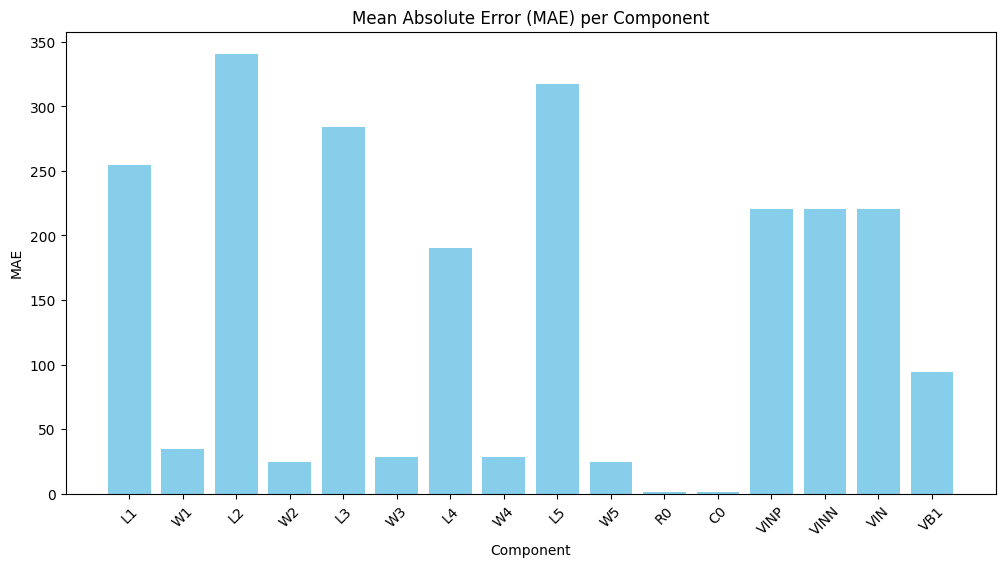

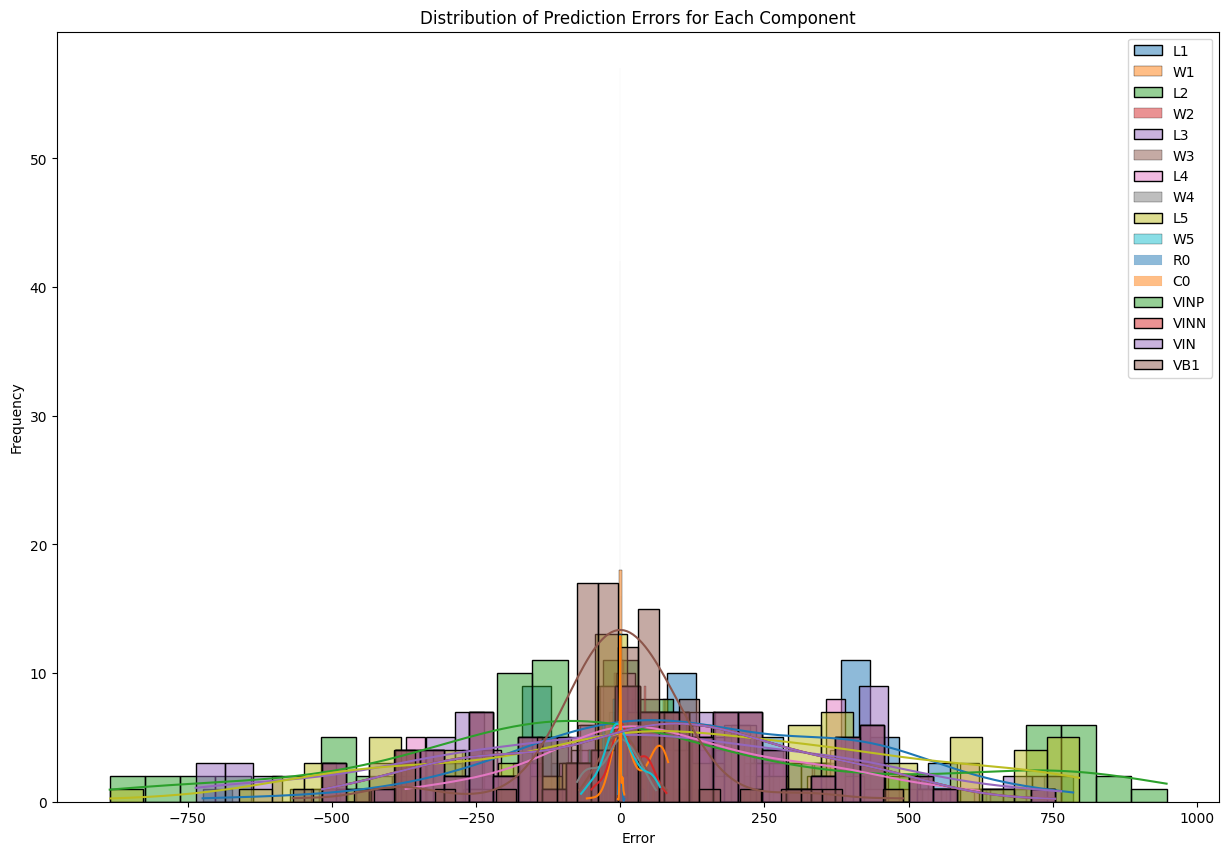

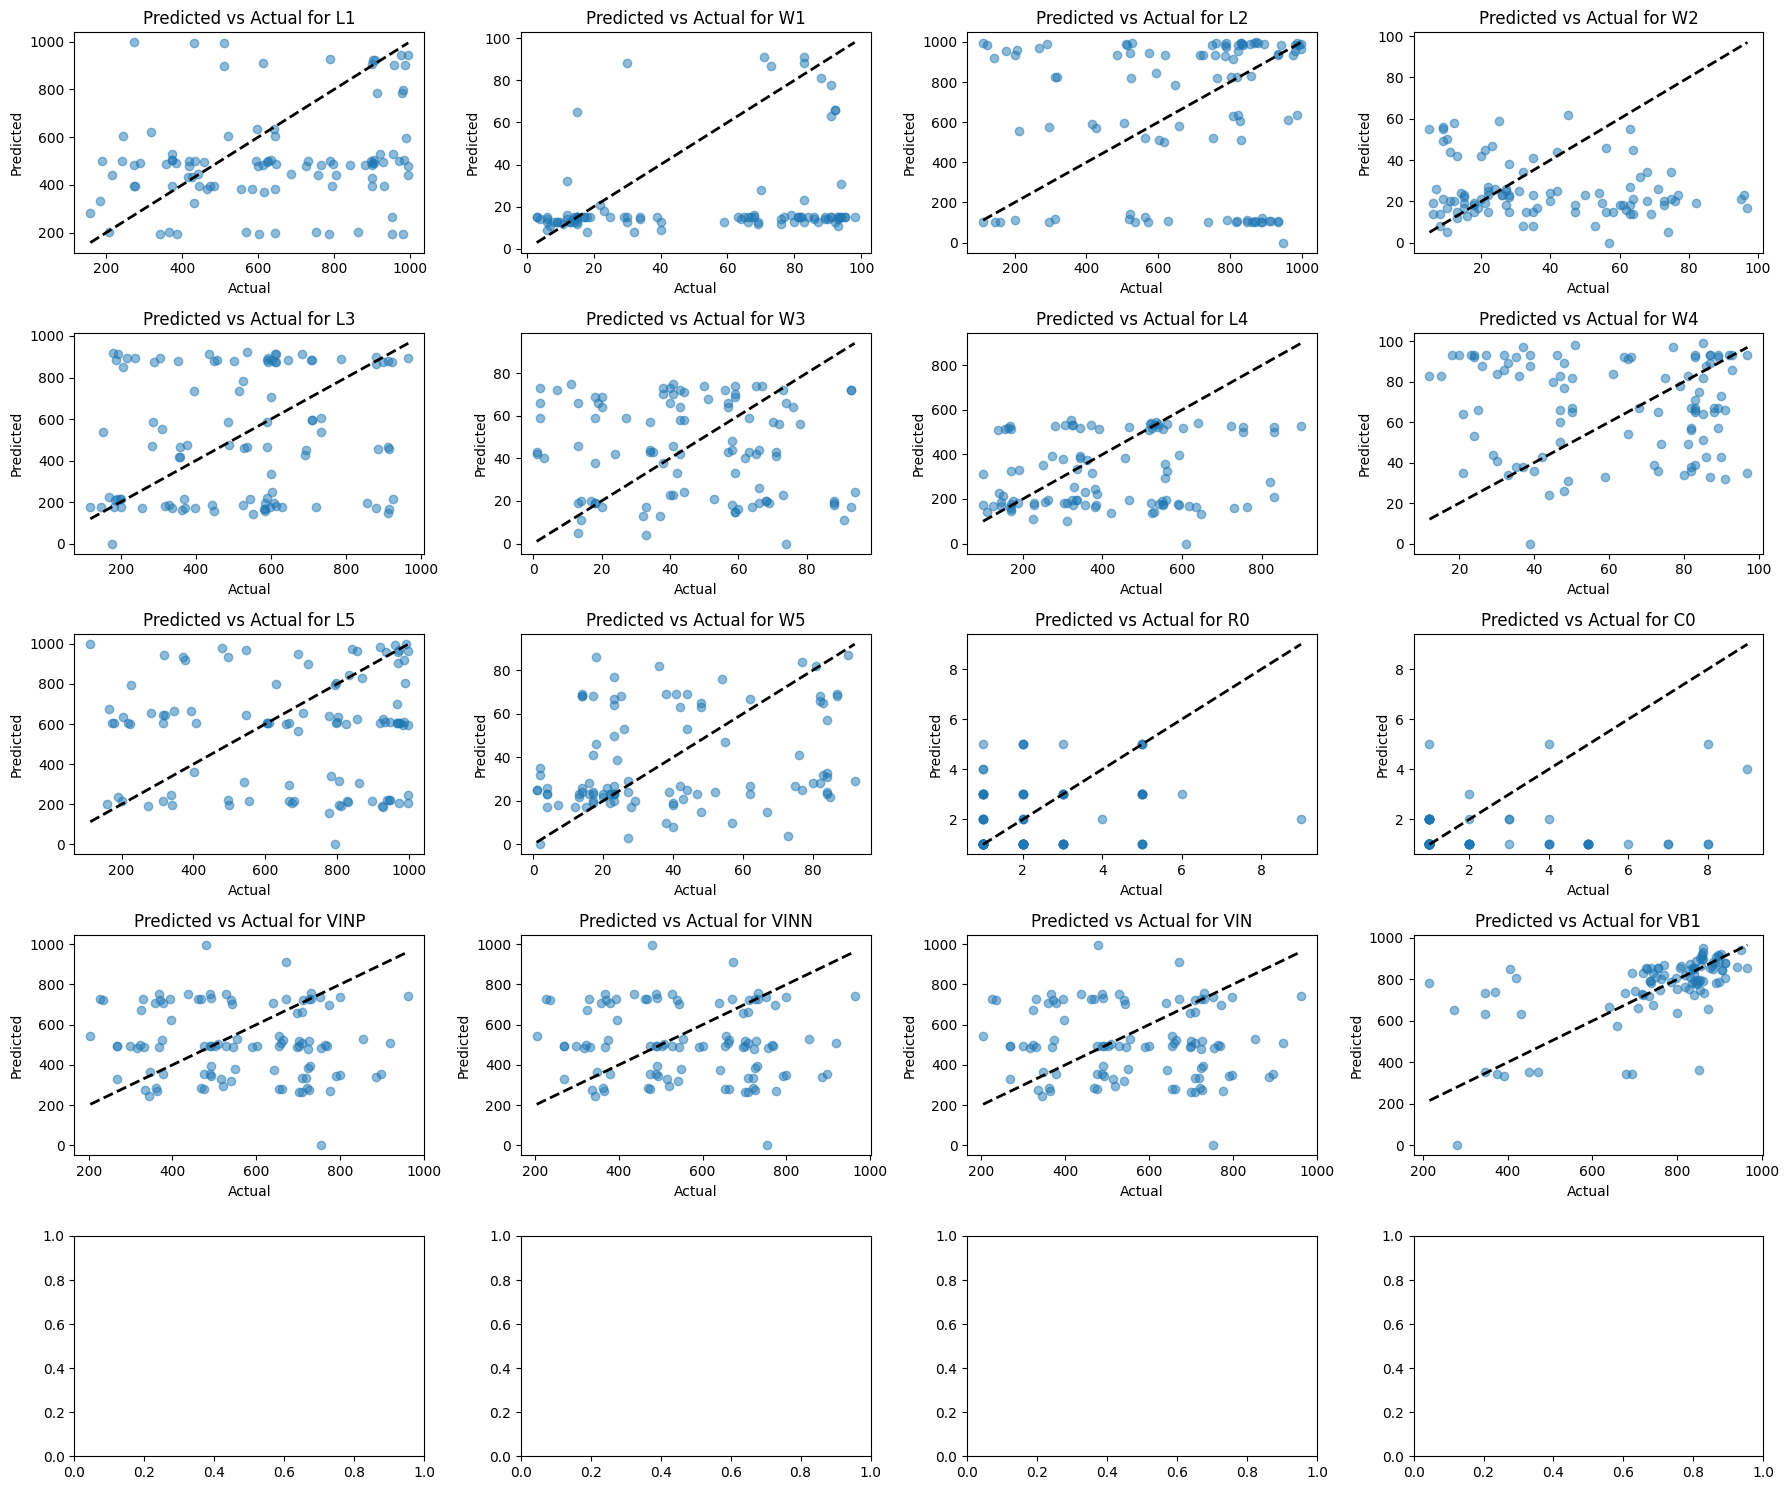

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# 1. MAE per Component
mae_results = {}
for component in components:
    actual = actual_df[component].dropna()
    predicted = predicted_df[component].dropna()
    actual, predicted = actual.align(predicted, join='inner')  # Align on matching indices
    mae_results[component] = mean_absolute_error(actual, predicted) if not actual.empty else None

# Plot MAE per component
plt.figure(figsize=(12, 6))
plt.bar(mae_results.keys(), mae_results.values(), color='skyblue')
plt.title("Mean Absolute Error (MAE) per Component")
plt.xlabel("Component")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.show()

# 2. Error Distribution for Each Component
plt.figure(figsize=(15, 10))
for component in components:
    actual = actual_df[component].dropna()
    predicted = predicted_df[component].dropna()
    errors = (actual - predicted).dropna()
    sns.histplot(errors, kde=True, label=component, bins=30)
plt.title("Distribution of Prediction Errors for Each Component")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 3. Predicted vs Actual Values
fig, axes = plt.subplots(5, 4, figsize=(18, 15))
axes = axes.flatten()
for i, component in enumerate(components):
    actual = actual_df[component]
    predicted = predicted_df[component]
    axes[i].scatter(actual, predicted, alpha=0.5)
    axes[i].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
    axes[i].set_title(f"Predicted vs Actual for {component}")
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")
plt.tight_layout()
plt.show()

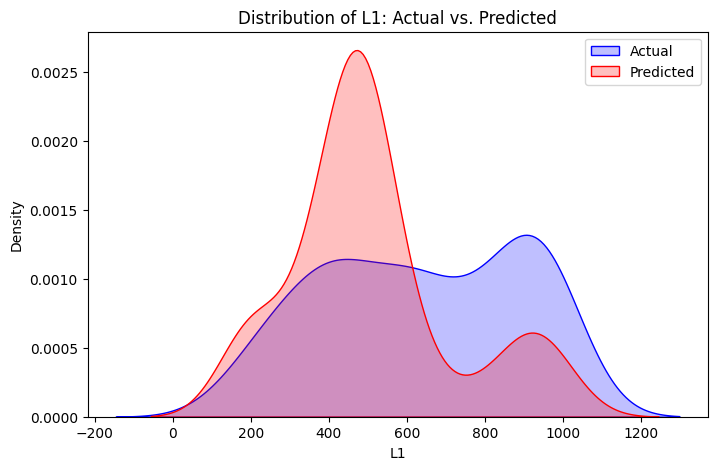

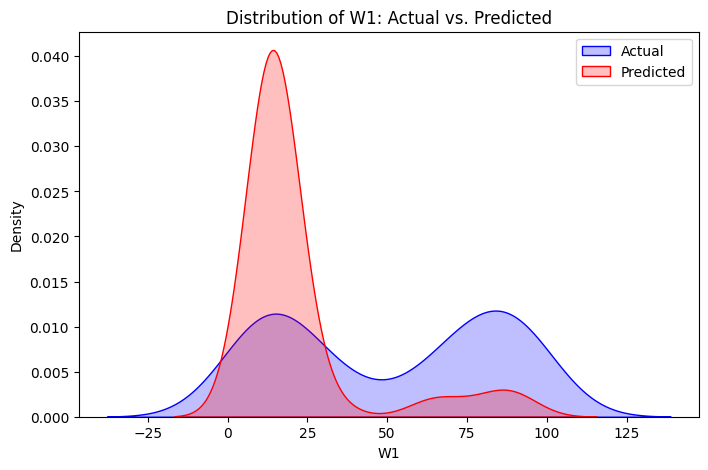

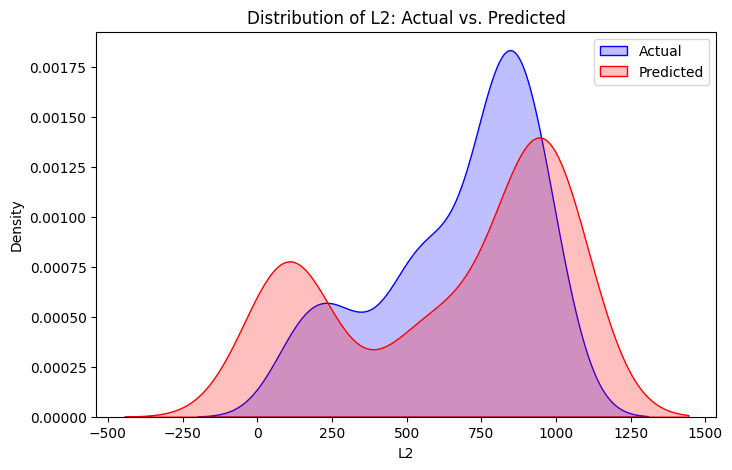

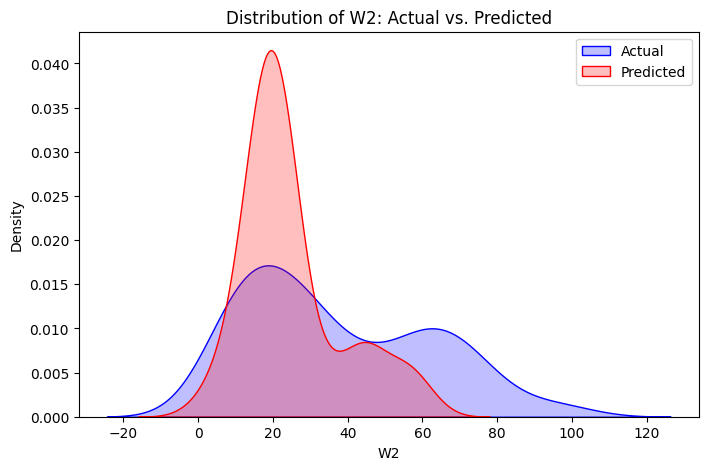

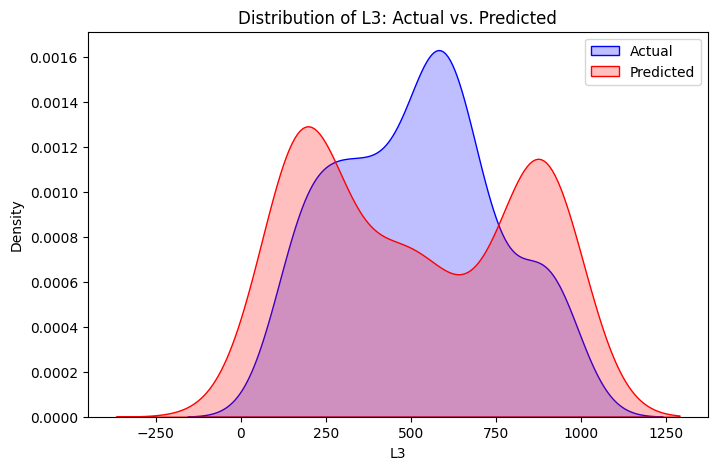

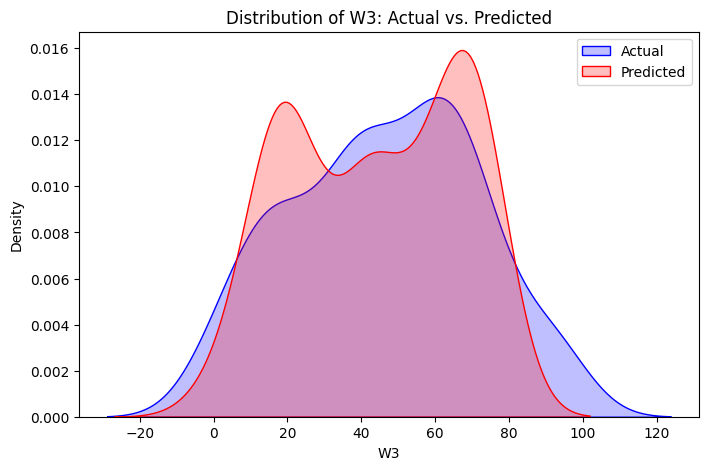

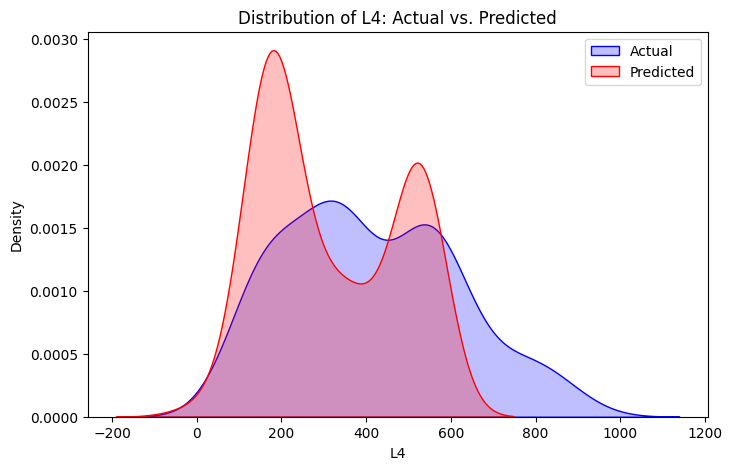

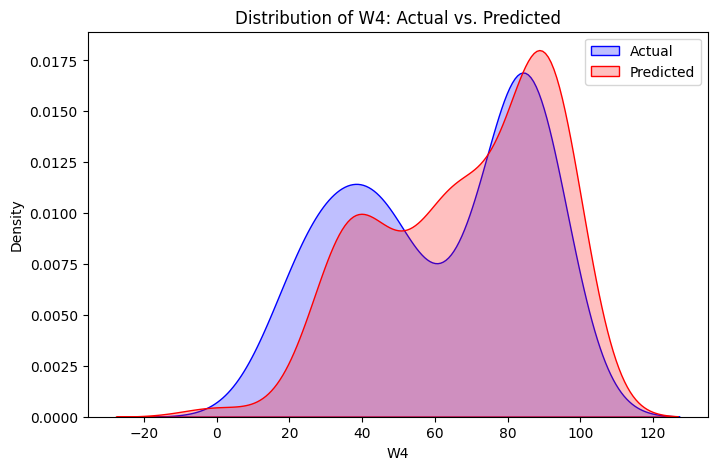

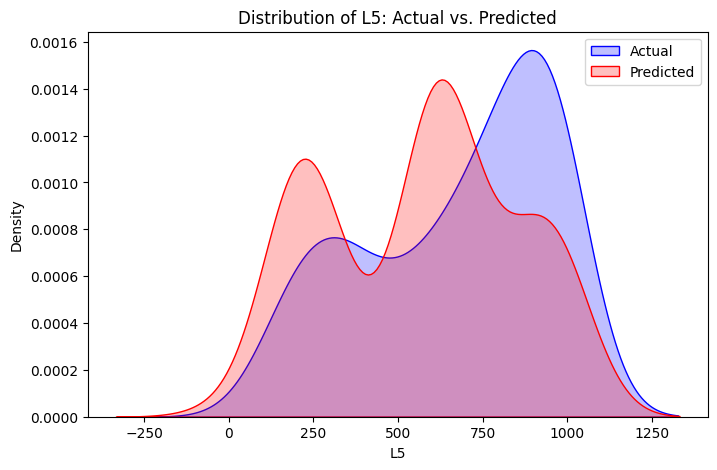

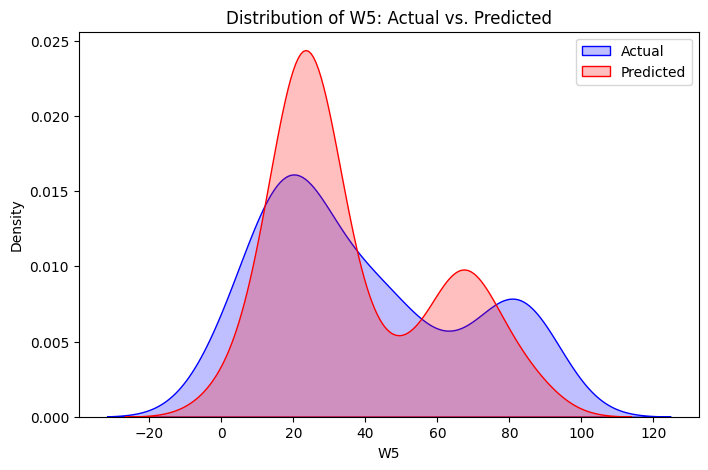

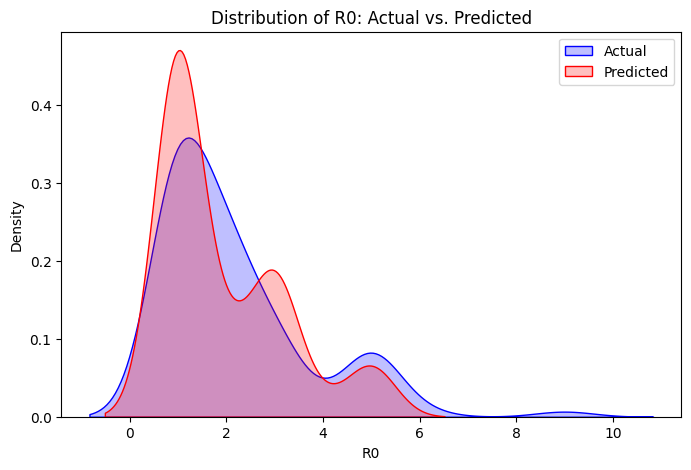

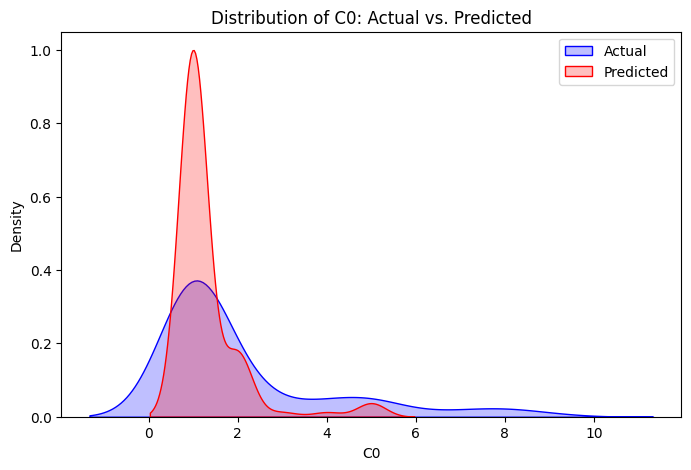

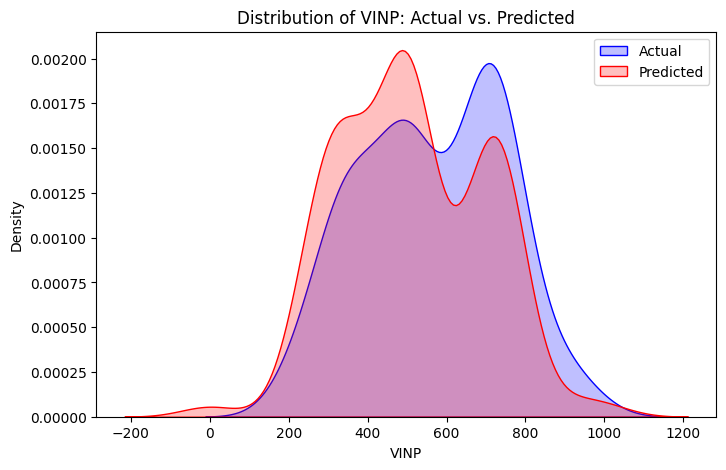

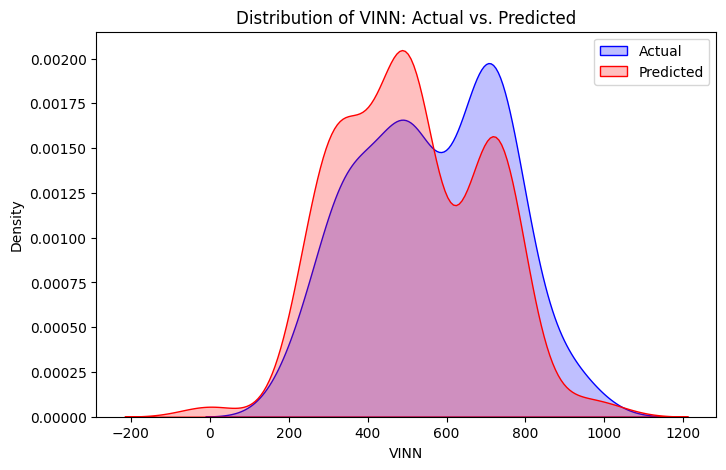

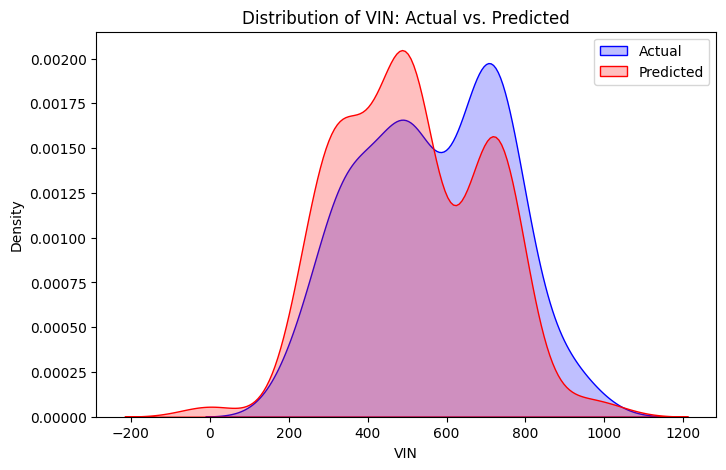

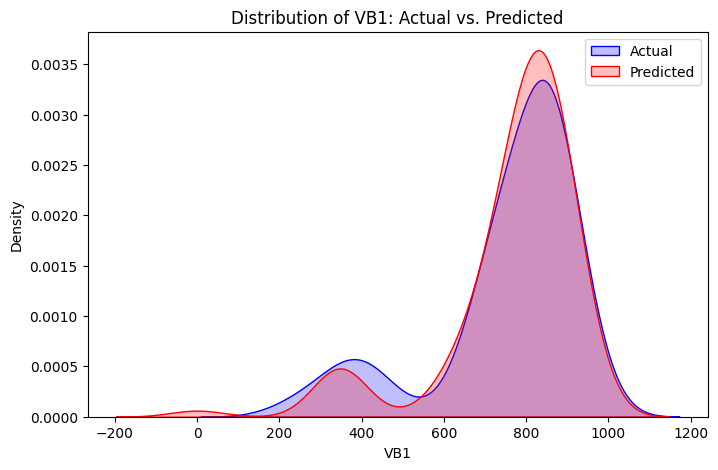

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of actual vs. predicted values for each component
for component in components:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(actual_df[component].dropna(), label="Actual", color="blue", fill=True)
    sns.kdeplot(predicted_df[component].dropna(), label="Predicted", color="red", fill=True)
    plt.title(f"Distribution of {component}: Actual vs. Predicted")
    plt.xlabel(component)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

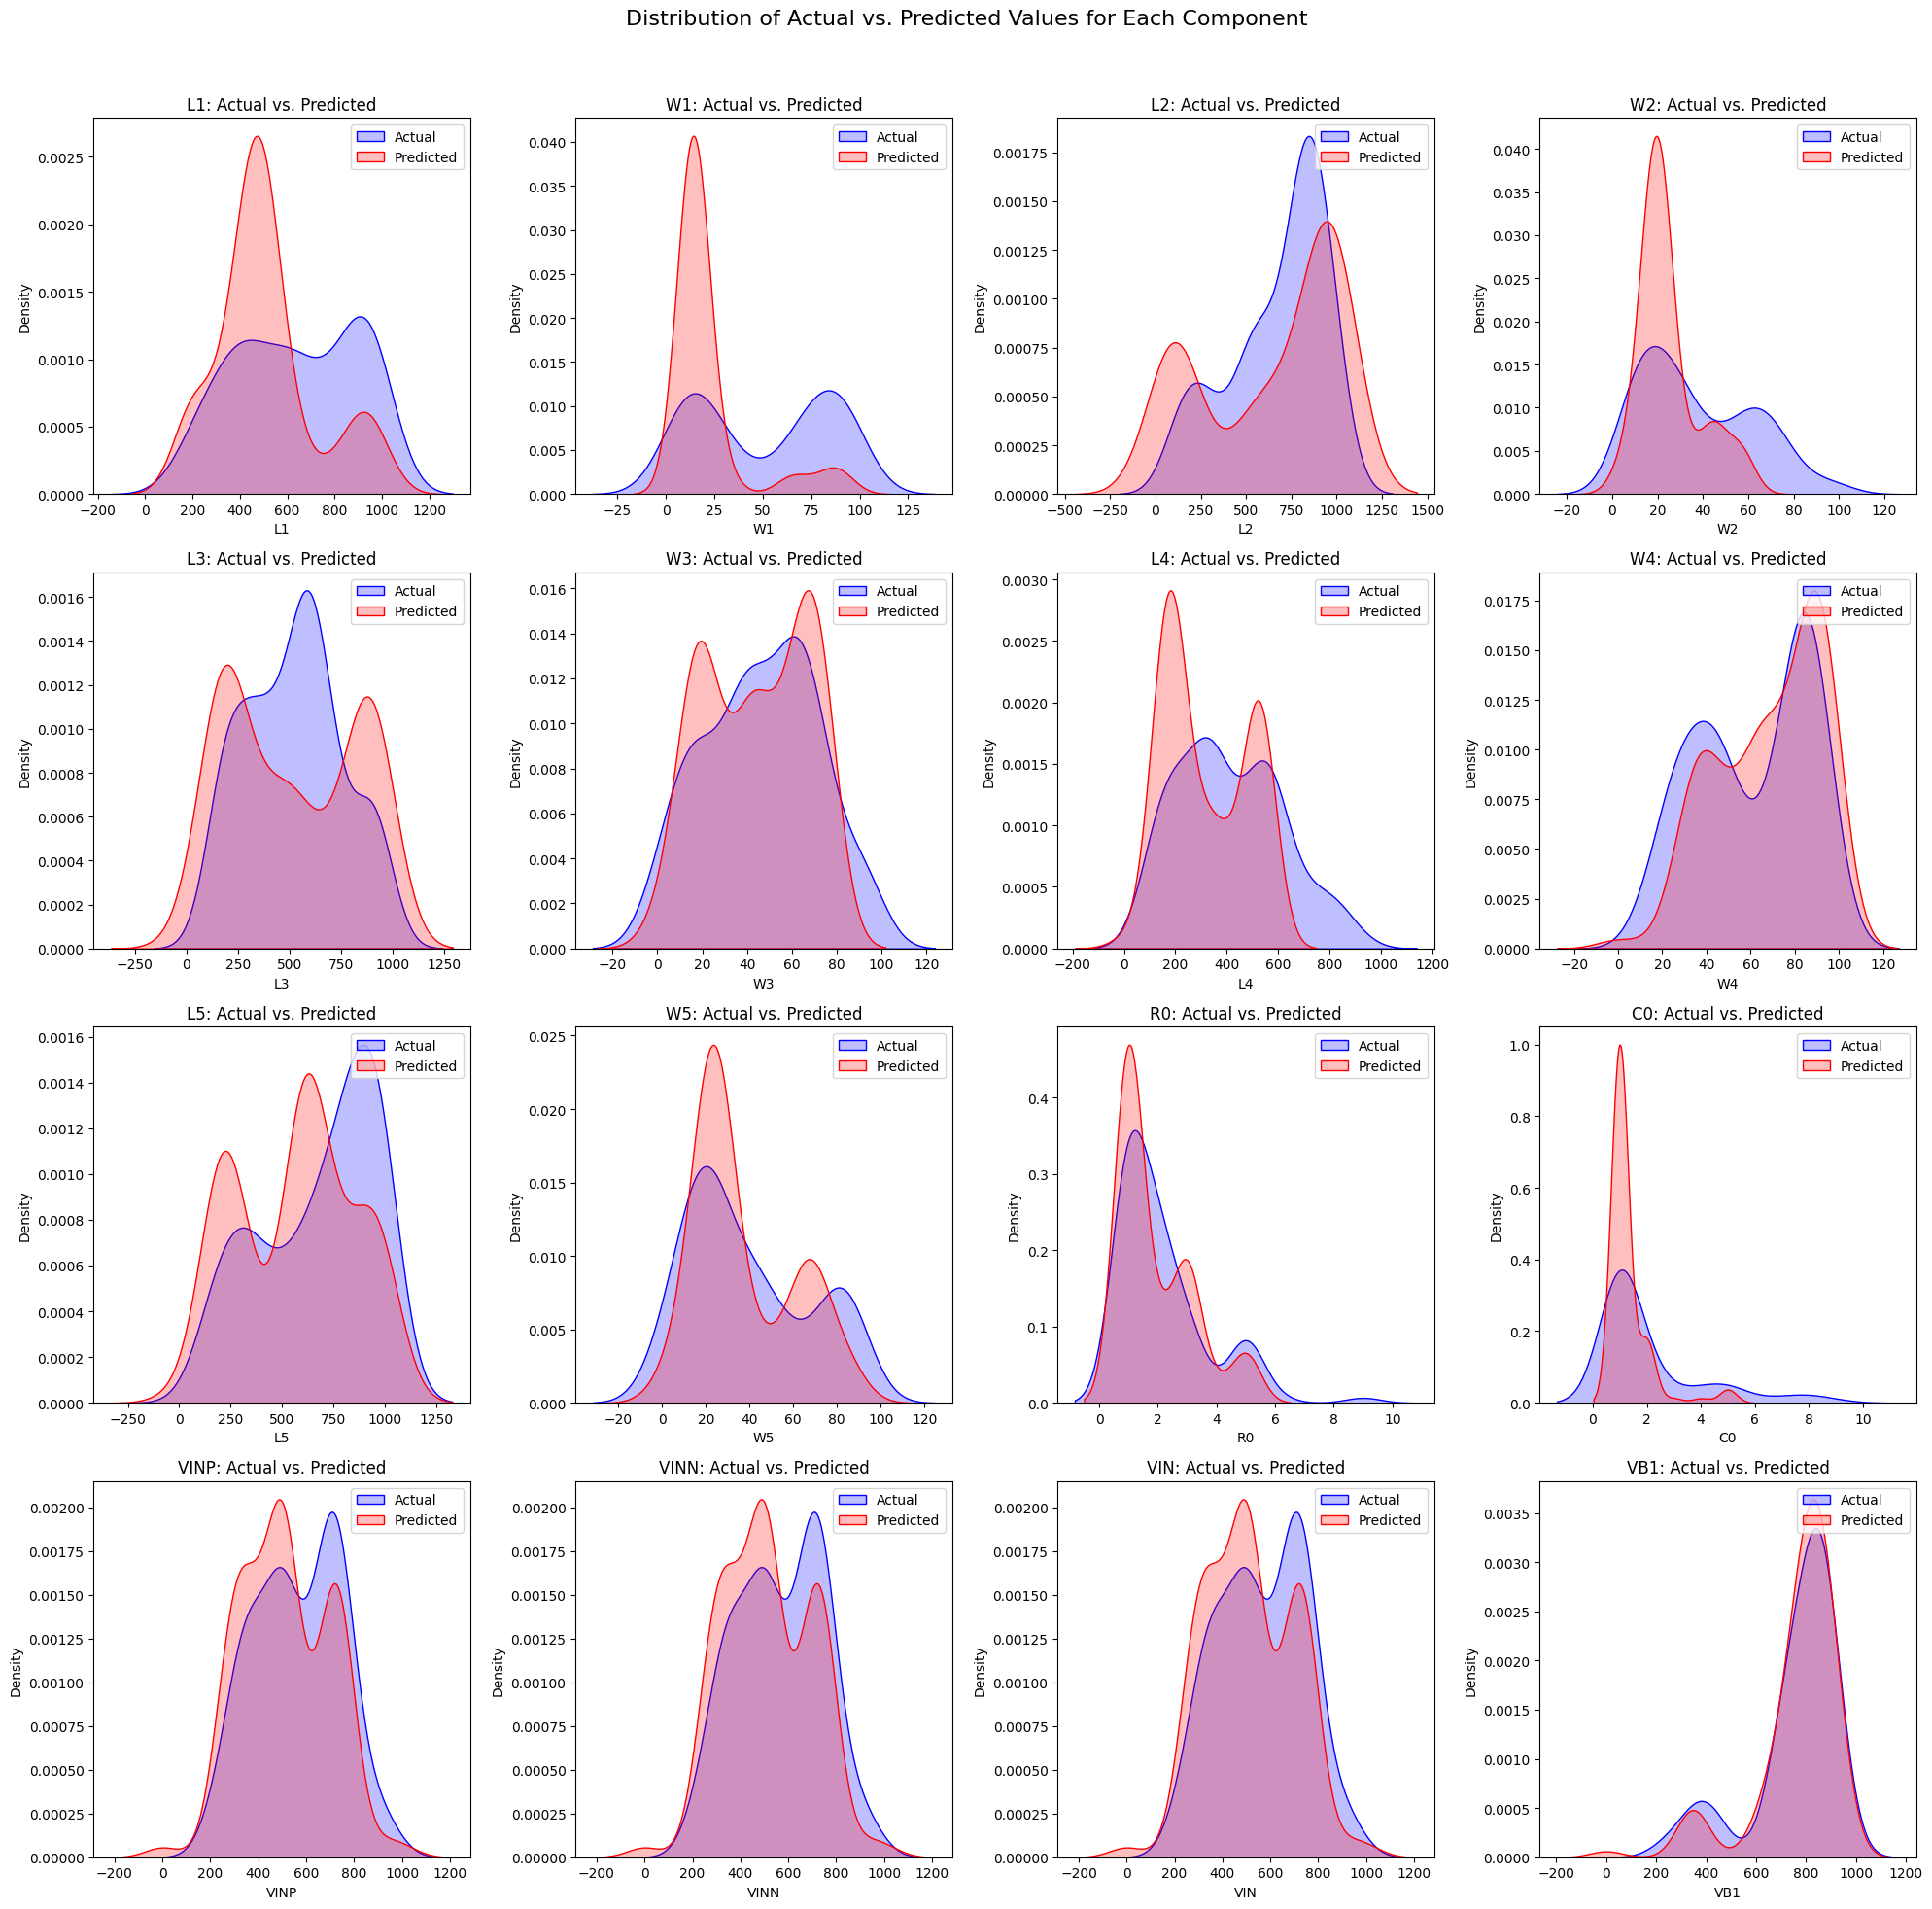

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of components to plot
num_components = len(components)
ncols = 4  # Set number of columns to 4
nrows = (num_components // ncols) + (num_components % ncols > 0)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
fig.suptitle("Distribution of Actual vs. Predicted Values for Each Component", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each component
for i, component in enumerate(components):
    sns.kdeplot(actual_df[component].dropna(), label="Actual", color="blue", fill=True, ax=axes[i])
    sns.kdeplot(predicted_df[component].dropna(), label="Predicted", color="red", fill=True, ax=axes[i])
    axes[i].set_title(f"{component}: Actual vs. Predicted")
    axes[i].set_xlabel(component)
    axes[i].set_ylabel("Density")
    axes[i].legend()

# Hide any empty subplots if the number of components isn't a perfect multiple of 4
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout and keep space for title
plt.show()

<ipython-input-66-02cd2891f959>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Component", y="MAE", data=mae_df, palette="viridis")


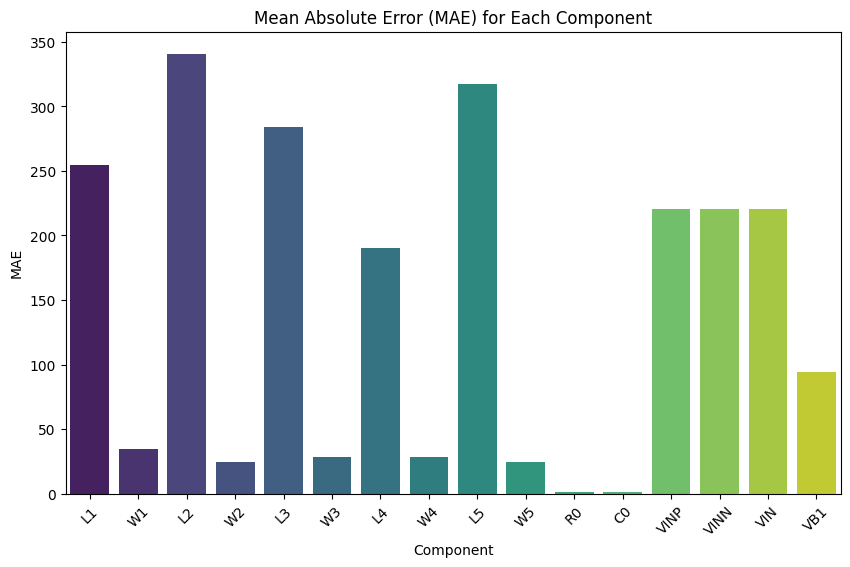

In [ ]:
import pandas as pd

# Plot Mean Absolute Error (MAE) for each component
mae_df = pd.DataFrame({"Component": components, "MAE": [mae_results[comp] for comp in components]})
plt.figure(figsize=(10, 6))
sns.barplot(x="Component", y="MAE", data=mae_df, palette="viridis")
plt.title("Mean Absolute Error (MAE) for Each Component")
plt.xlabel("Component")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.show()

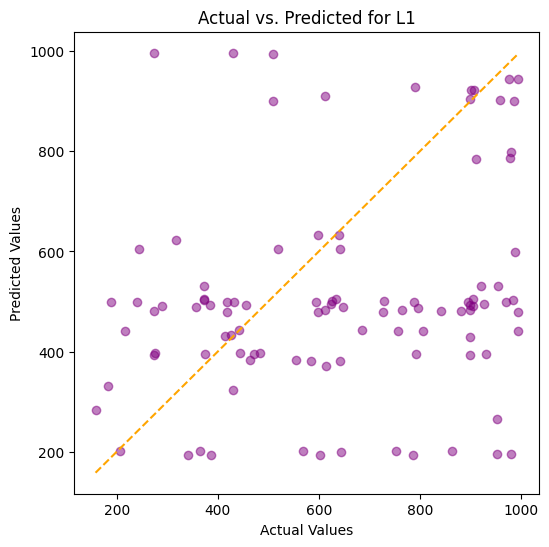

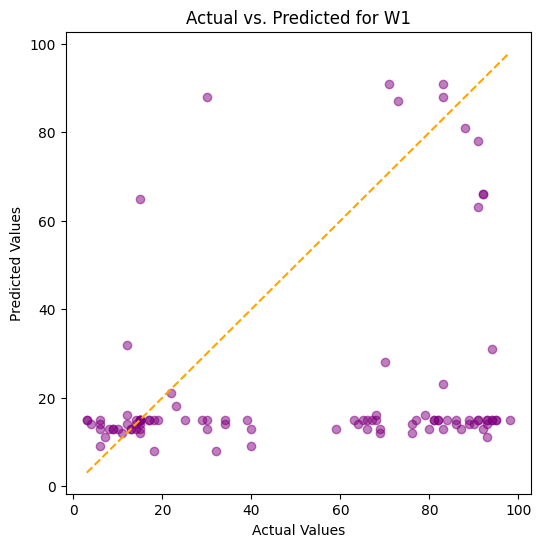

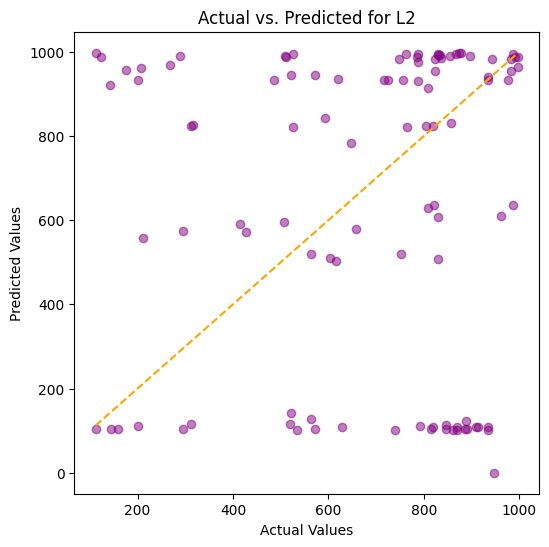

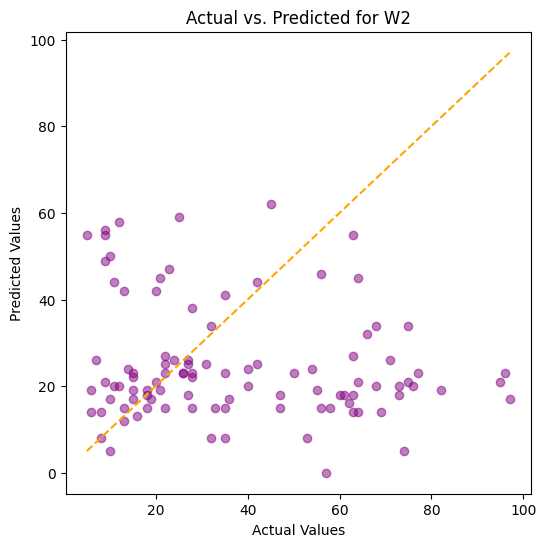

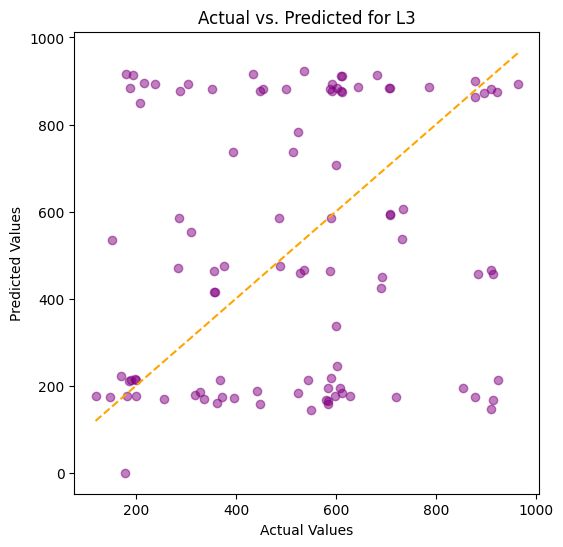

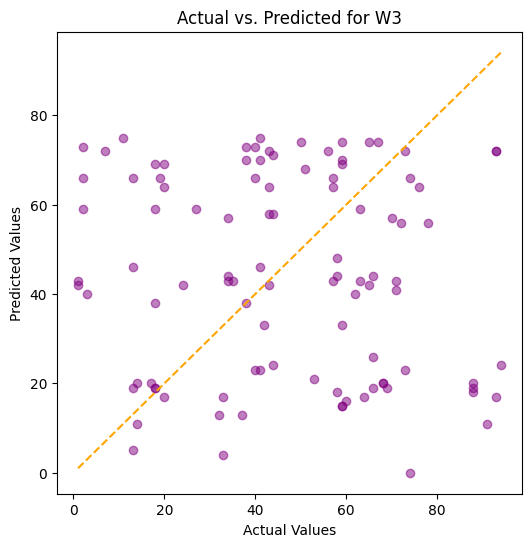

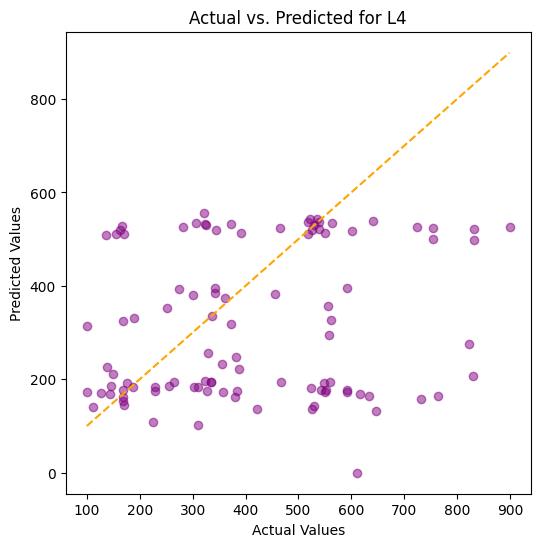

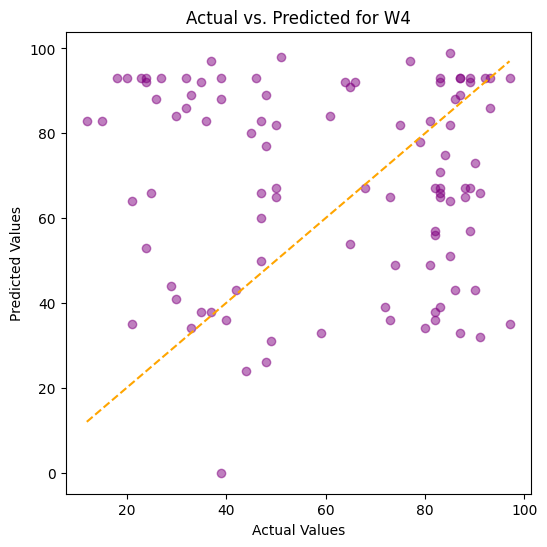

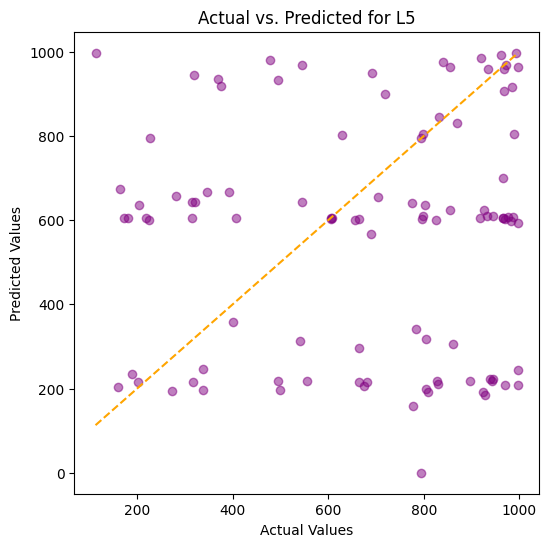

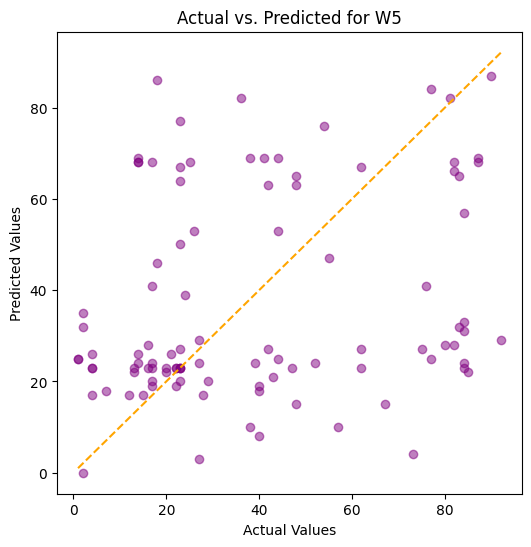

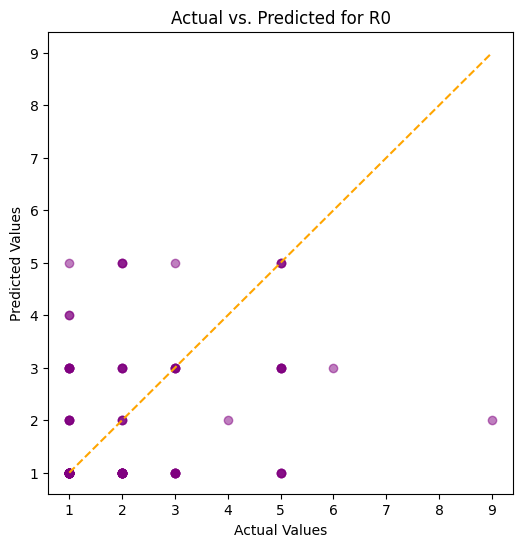

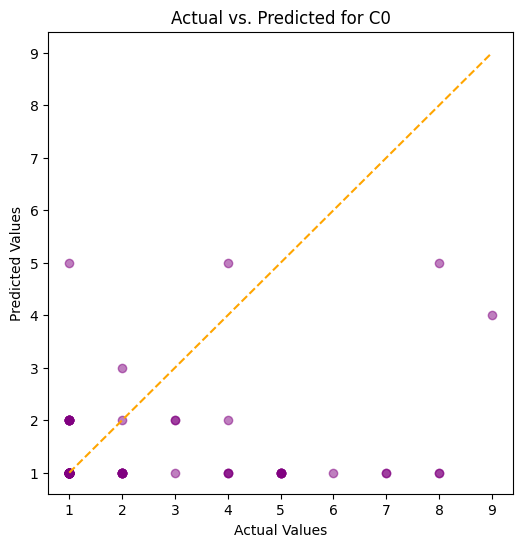

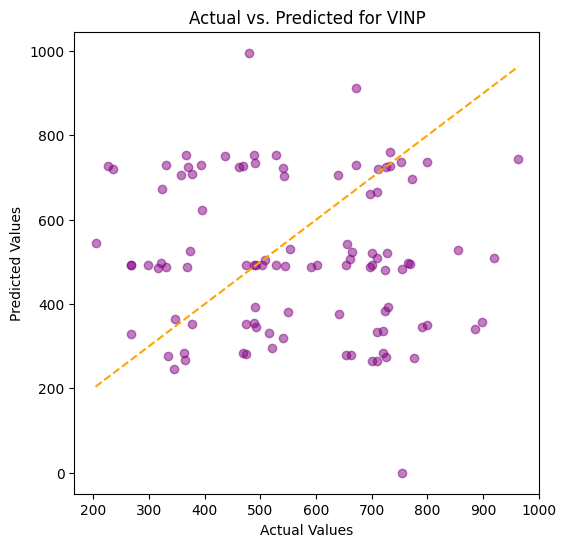

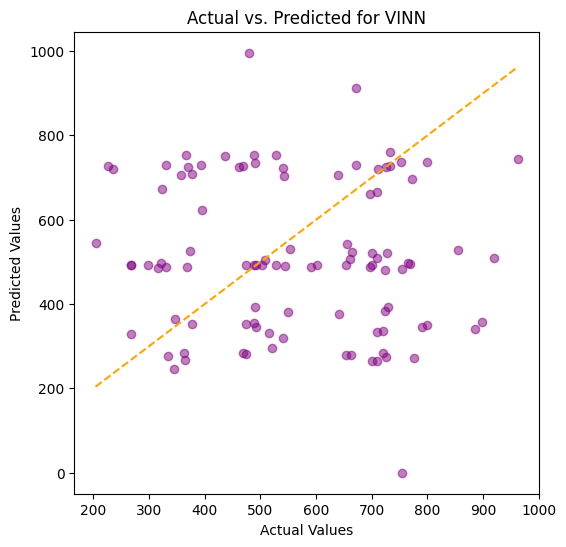

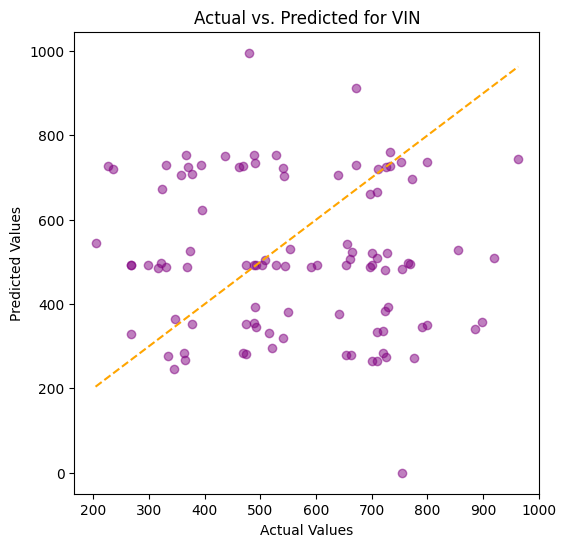

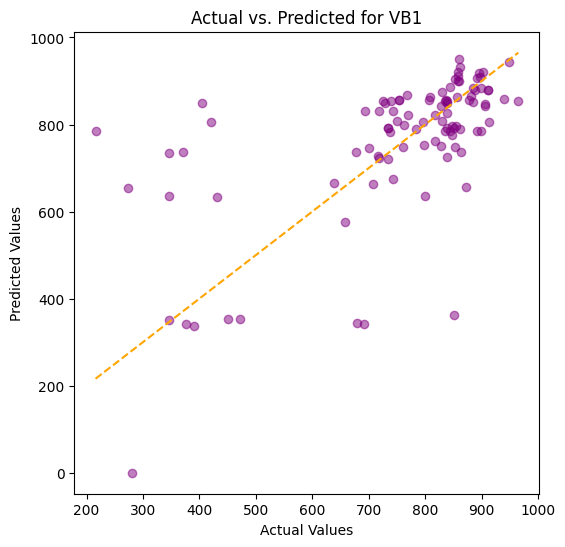

In [ ]:
# Plot scatter plot of actual vs. predicted values for each component
for component in components:
    plt.figure(figsize=(6, 6))
    plt.scatter(actual_df[component], predicted_df[component], alpha=0.5, color="purple")
    plt.plot([actual_df[component].min(), actual_df[component].max()],
             [actual_df[component].min(), actual_df[component].max()],
             color="orange", linestyle="--")  # Reference line for perfect predictions
    plt.title(f"Actual vs. Predicted for {component}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

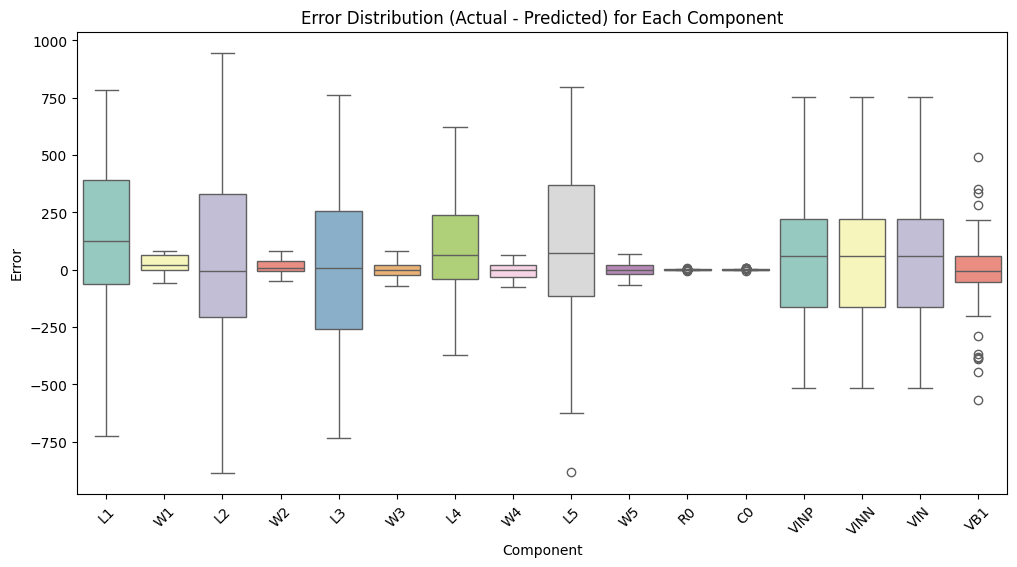

In [ ]:
# Calculate error (difference) between actual and predicted values for each component
error_df = actual_df - predicted_df

# Plot box plot of errors for each component
plt.figure(figsize=(12, 6))
sns.boxplot(data=error_df, palette="Set3")
plt.title("Error Distribution (Actual - Predicted) for Each Component")
plt.xlabel("Component")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.show()

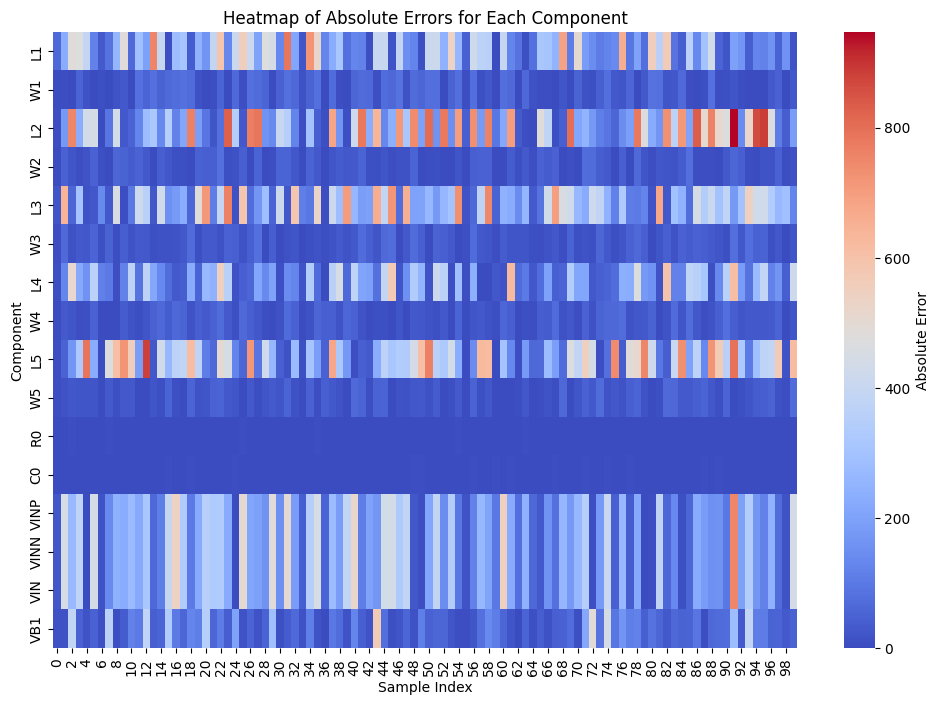

In [ ]:
# Calculate absolute error
abs_error_df = abs(error_df)

# Display heatmap of absolute errors
plt.figure(figsize=(12, 8))
sns.heatmap(abs_error_df.T, cmap="coolwarm", annot=False, cbar_kws={"label": "Absolute Error"})
plt.title("Heatmap of Absolute Errors for Each Component")
plt.xlabel("Sample Index")
plt.ylabel("Component")
plt.show()

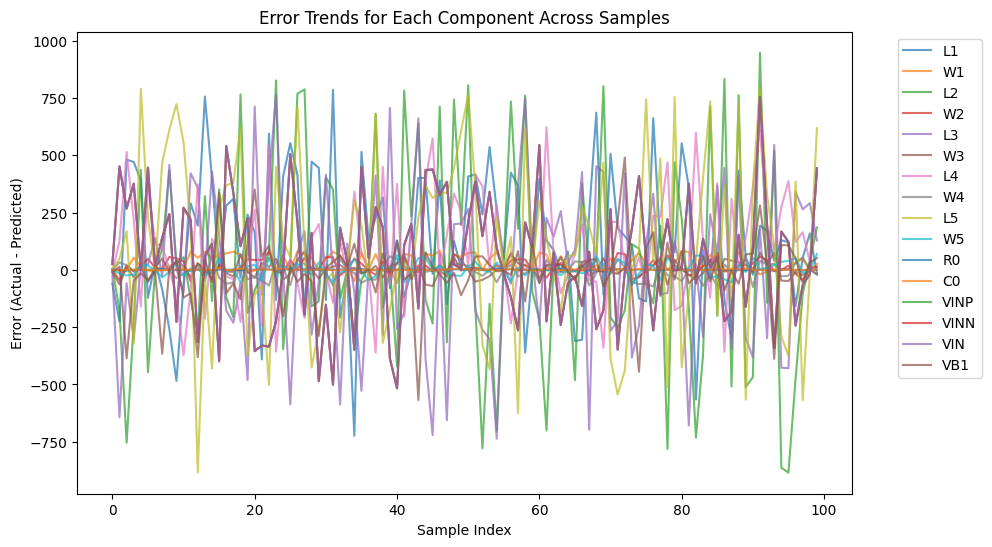

In [ ]:
# Plot component-wise error trends across samples
plt.figure(figsize=(10, 6))
for component in components:
    plt.plot(error_df[component], label=component, alpha=0.7)
plt.title("Error Trends for Each Component Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Error (Actual - Predicted)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Tolerance-Based Accuracy for Transistor Lengths and Biasing Voltages:
   Component  Tolerance Accuracy (%)
0        L1                    36.0
1        L2                    38.0
2        L3                    27.0
3        L4                    29.0
4        L5                    31.0
5      VINP                    32.0
6      VINN                    32.0
7       VIN                    32.0
8       VB1                    87.0


<ipython-input-74-6ccd1a11bde1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Component", y="Tolerance Accuracy (%)", data=tolerance_df, palette="viridis")


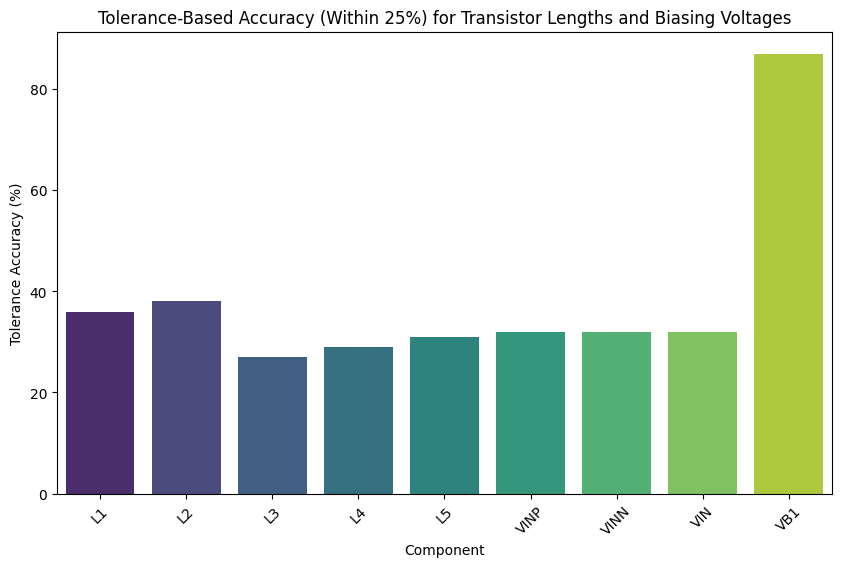

In [ ]:
# Define components to check for tolerance-based accuracy
tolerance_components = ['L1', 'L2', 'L3', 'L4', 'L5', 'VINP', 'VINN', 'VIN', 'VB1']

# Set tolerance percentage (25%)
tolerance_percent = 0.25

# Function to check if predicted values are within the tolerance range of actual values
def within_tolerance(actual, predicted, tolerance):
    return abs(actual - predicted) <= tolerance

# Calculate tolerance accuracy for each component
tolerance_results = {}
for component in tolerance_components:
    # Calculate the absolute tolerance based on actual values
    tolerance_values = tolerance_percent * actual_df[component]

    # Check if predictions are within tolerance range
    within_tolerance_mask = within_tolerance(actual_df[component], predicted_df[component], tolerance_values)

    # Calculate the percentage of values within tolerance
    tolerance_accuracy = within_tolerance_mask.mean() * 100  # Convert to percentage
    tolerance_results[component] = tolerance_accuracy

# Convert results to DataFrame and display
tolerance_df = pd.DataFrame(list(tolerance_results.items()), columns=["Component", "Tolerance Accuracy (%)"])
print("Tolerance-Based Accuracy for Transistor Lengths and Biasing Voltages:\n", tolerance_df)

# Visualize tolerance-based accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Component", y="Tolerance Accuracy (%)", data=tolerance_df, palette="viridis")
plt.title("Tolerance-Based Accuracy (Within 25%) for Transistor Lengths and Biasing Voltages")
plt.xlabel("Component")
plt.ylabel("Tolerance Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

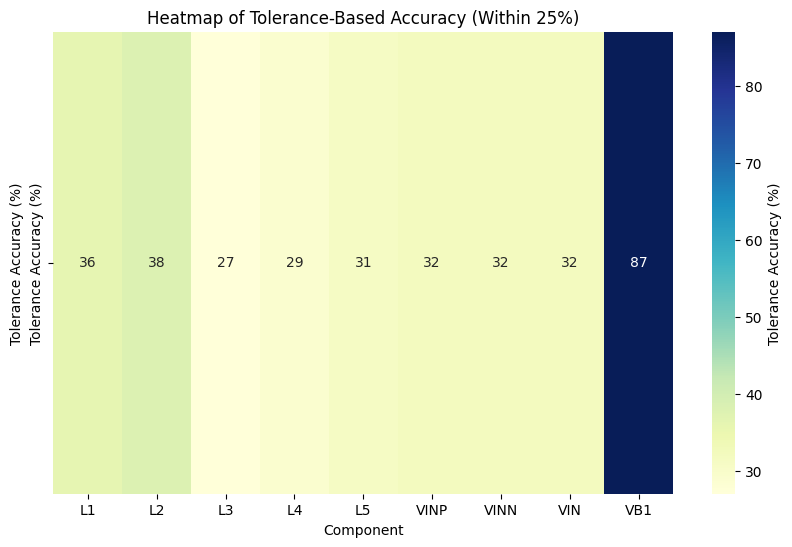

In [ ]:
# Heatmap for Tolerance-Based Accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(tolerance_df.set_index("Component").T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Tolerance Accuracy (%)'})
plt.title("Heatmap of Tolerance-Based Accuracy (Within 25%)")
plt.xlabel("Component")
plt.ylabel("Tolerance Accuracy (%)")
plt.show()

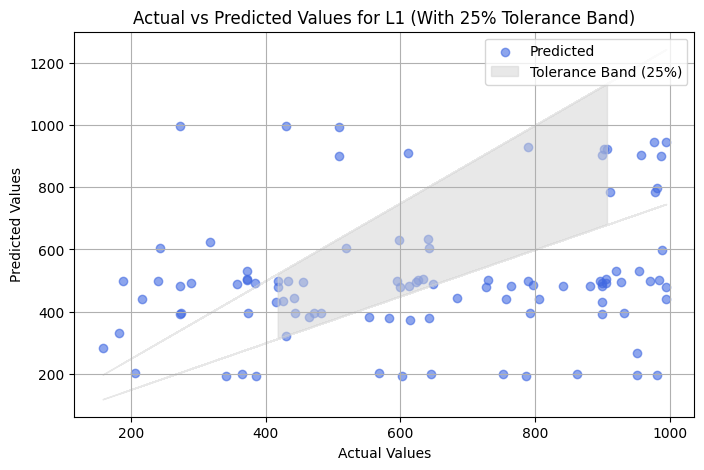

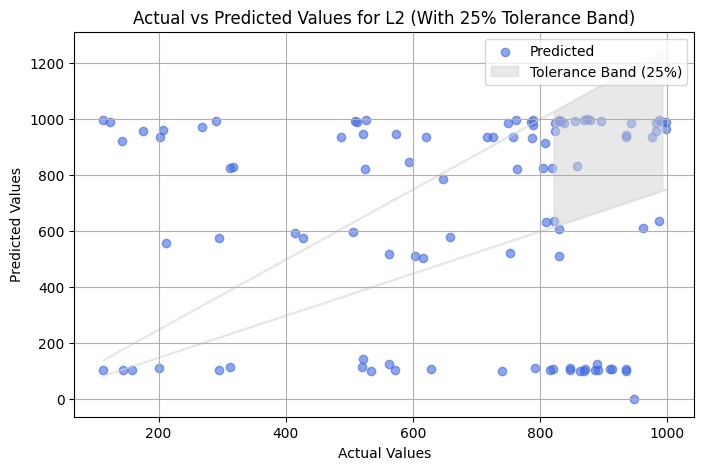

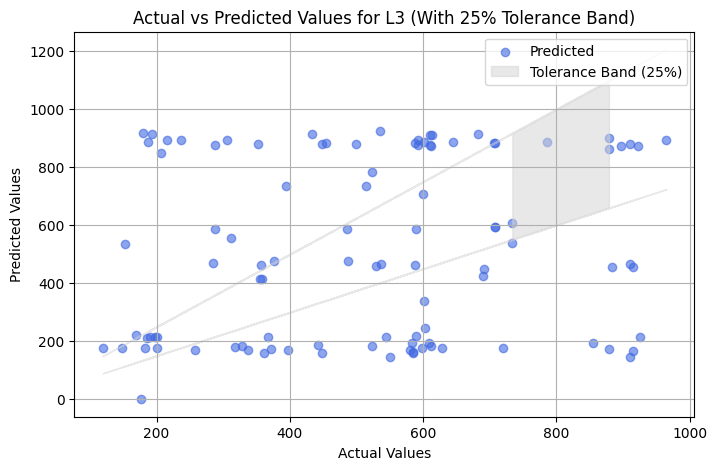

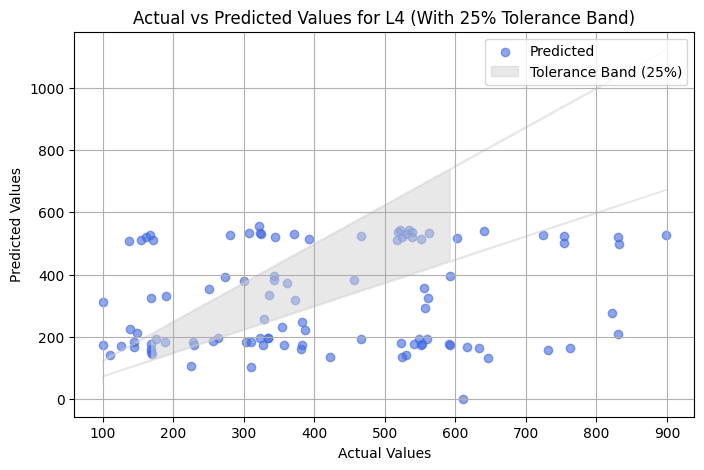

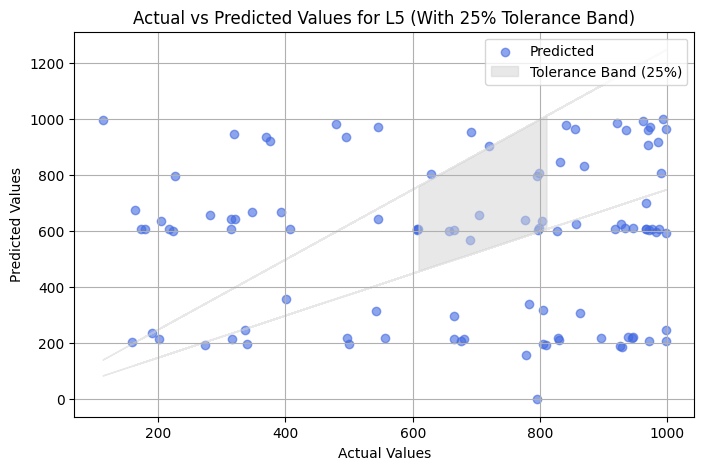

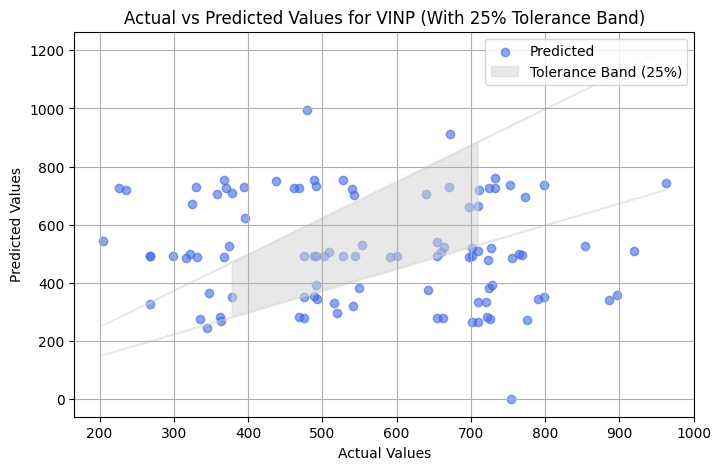

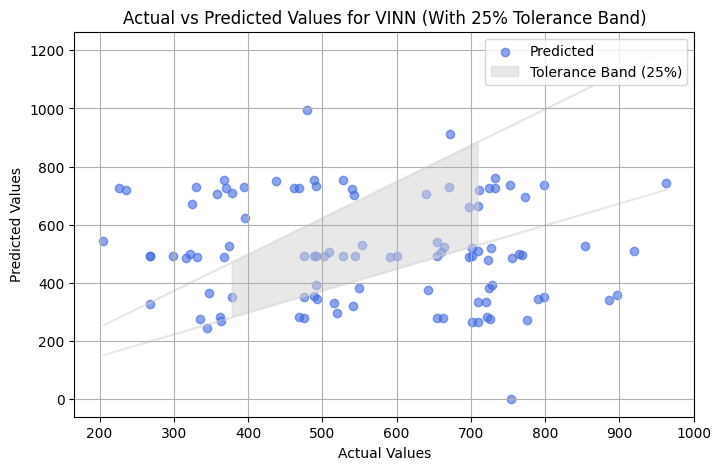

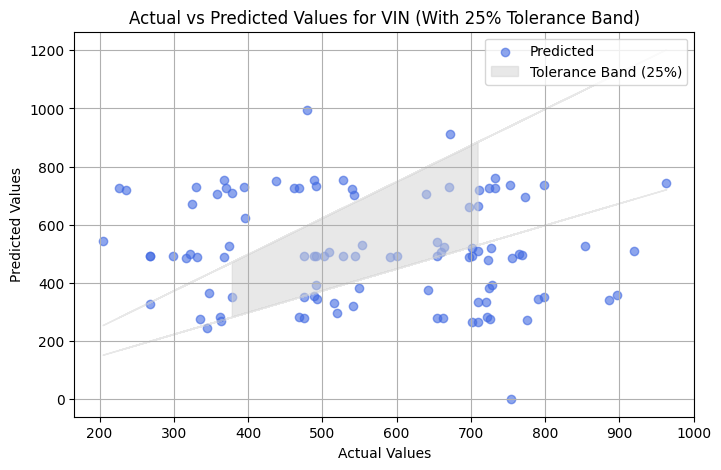

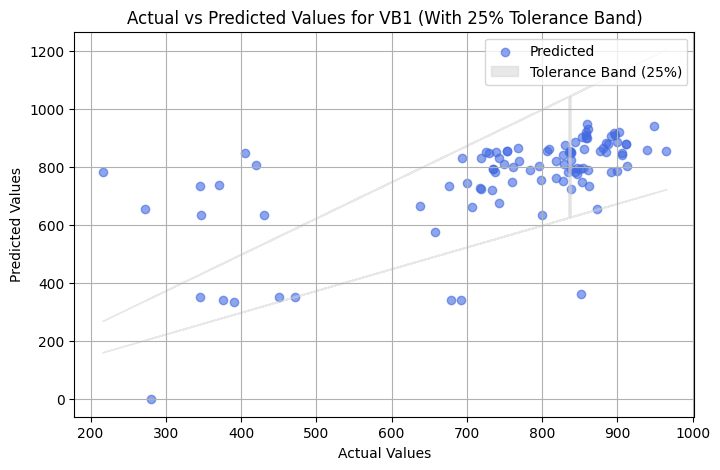

In [ ]:
# Plot Actual vs Predicted for Transistor Lengths within Tolerance Band
for component in tolerance_components:
    plt.figure(figsize=(8, 5))
    plt.scatter(actual_df[component], predicted_df[component], alpha=0.6, label="Predicted", color="royalblue")

    # Plot tolerance band
    lower_bound = actual_df[component] * (1 - tolerance_percent)
    upper_bound = actual_df[component] * (1 + tolerance_percent)
    plt.fill_between(actual_df[component], lower_bound, upper_bound, color="lightgrey", alpha=0.5, label="Tolerance Band (25%)")

    plt.title(f"Actual vs Predicted Values for {component} (With 25% Tolerance Band)")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()

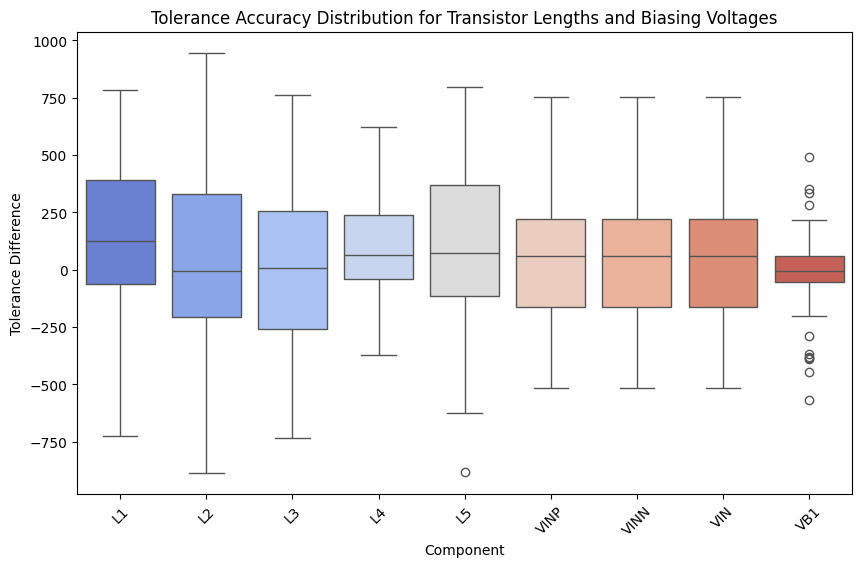

In [ ]:
# Distribution plot of tolerance accuracy
plt.figure(figsize=(10, 6))
sns.boxplot(data=[actual_df[comp] - predicted_df[comp] for comp in tolerance_components], palette="coolwarm")
plt.xticks(ticks=range(len(tolerance_components)), labels=tolerance_components, rotation=45)
plt.title("Tolerance Accuracy Distribution for Transistor Lengths and Biasing Voltages")
plt.xlabel("Component")
plt.ylabel("Tolerance Difference")
plt.show()

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer
# from peft import PeftModel, PeftConfig

# # Set the model name from your Hugging Face Hub repository
# base_model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"
# adapter_model_name = "ahsanm/two_stage_amplifier_design_llama3.1-8B-Instruct"  # Replace with your Hub model ID

# # Load the base model and tokenizer
# model = AutoModelForCausalLM.from_pretrained(base_model_name, device_map="auto", trust_remote_code=False)
# tokenizer = AutoTokenizer.from_pretrained(base_model_name, use_fast=True)

# # Load the fine-tuned LoRA adapter
# config = PeftConfig.from_pretrained(adapter_model_name)
# model = PeftModel.from_pretrained(model, adapter_model_name)